# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("Keep 'er moving'")

Keep 'er moving'
City Name: nalut, City ID: 2214432
City Name: neiafu, City ID: 4032420
Keep 'er moving'
City Name: bluff, City ID: 2206939
Keep 'er moving'
City Name: tiksi, City ID: 2015306
City Name: hobart, City ID: 2163355
City Name: kahului, City ID: 5847411
City Name: ribeira grande, City ID: 3372707
City Name: airai, City ID: 1651810
Keep 'er moving'
City Name: champerico, City ID: 3598787
City Name: suntar, City ID: 2015913
City Name: qui nhon, City ID: 1568574
Keep 'er moving'
City Name: clyde river, City ID: 5924351
City Name: rikitea, City ID: 4030556
City Name: vila velha, City ID: 3445026
Keep 'er moving'
City Name: tuktoyaktuk, City ID: 6170031
City Name: arman, City ID: 2127060
City Name: puerto ayora, City ID: 3652764
City Name: mehamn, City ID: 778707
City Name: tuatapere, City ID: 2180815
City Name: moldoveni, City ID: 672901
City Name: srednekolymsk, City ID: 2121025
City Name: longyearbyen, City ID: 2729907
City Name: butaritari, City ID: 2110227
City Name: mount g

City Name: akyab, City ID: 1295765
Keep 'er moving'
City Name: constitucion, City ID: 3893726
City Name: vallenar, City ID: 3868633
City Name: puerto madero, City ID: 3520989
City Name: mataram, City ID: 1635882
City Name: ust-maya, City ID: 2013918
City Name: hobyo, City ID: 57000
City Name: georgetown, City ID: 1735106
City Name: bahia blanca, City ID: 3865086
City Name: el alto, City ID: 3697441
City Name: magadan, City ID: 2123628
City Name: fort nelson, City ID: 5955902
City Name: kieta, City ID: 2094027
City Name: bongandanga, City ID: 218229
Keep 'er moving'
City Name: whitstable, City ID: 2634021
City Name: gizo, City ID: 2108857
City Name: marienburg, City ID: 3092472
Keep 'er moving'
City Name: sackville, City ID: 6137063
City Name: bandarbeyla, City ID: 64814
City Name: tasiilaq, City ID: 3424607
City Name: petropavlovsk-kamchatskiy, City ID: 2122104
City Name: shenzhen, City ID: 1795565
City Name: urucara, City ID: 3385670
City Name: college, City ID: 5859699
City Name: sev

City Name: sioux lookout, City ID: 6148373
City Name: pucara, City ID: 3931656
City Name: raudeberg, City ID: 3146487
City Name: utrera, City ID: 2510073
City Name: weligama, City ID: 1223738
City Name: trincomalee, City ID: 1226260
City Name: aklavik, City ID: 5882953
City Name: sarangani, City ID: 1687186
City Name: chengde, City ID: 2038087
City Name: saint-honore, City ID: 6138360
City Name: diffa, City ID: 2445704
City Name: baruun-urt, City ID: 2032614
City Name: kembe, City ID: 238373
City Name: samarai, City ID: 2132606
City Name: okhotsk, City ID: 2122605
City Name: vao, City ID: 2137773
City Name: martvili, City ID: 613065
City Name: high wycombe, City ID: 2646914
City Name: blackwater, City ID: 2175403
City Name: inuvik, City ID: 5983607
City Name: hambantota, City ID: 1244926
City Name: atasu, City ID: 1526041
City Name: bay roberts, City ID: 5895424
City Name: naklo nad notecia, City ID: 3091150
City Name: bull savanna, City ID: 3491161
City Name: mounana, City ID: 2397978

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country Code": country_list, "Latitude": lat_list, "Longitude": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Cloudy": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudy,Wind Speed
0,2214432,Nālūt,LY,30.3333,10.8500,54.27,51,15,16.24
1,4032420,Neiafu,TO,-18.6500,-173.9833,84.20,74,40,5.75
2,2206939,Bluff,NZ,-46.6000,168.3333,73.00,44,44,17.00
3,2015306,Tiksi,RU,71.6872,128.8694,2.79,84,70,7.09
4,2163355,Hobart,AU,-42.8794,147.3294,63.28,27,0,17.27


In [14]:
cities_df.to_csv("city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
cities_df.describe()


,City ID,Latitude,Longitude,Temperature,Humidity,Cloudy,Wind Speed
count,5.390000e+02,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,2.736345e+06,19.946908,16.123339,53.681837,72.233766,53.408163,8.055622
std,1.614308e+06,33.176885,91.215773,26.948803,19.960674,38.504772,5.453250
min,5.365400e+04,-54.800000,-175.200000,-22.110000,11.000000,0.000000,0.200000
25%,1.572438e+06,-6.395600,-66.906700,35.600000,62.000000,13.000000,3.440000
50%,2.308278e+06,22.616300,17.944200,61.020000,76.000000,61.000000,6.910000
75%,3.679414e+06,48.560300,95.864250,75.360000,88.000000,90.000000,11.240000
max,7.601762e+06,78.218600,178.416700,97.810000,100.000000,100.000000,29.930000


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

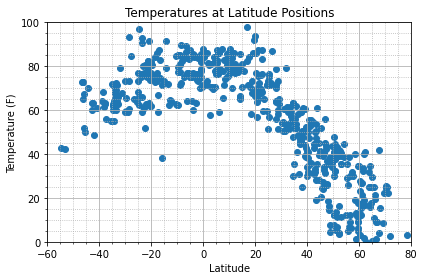

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = cities_df["Latitude"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs Temperature.png")

## Latitude vs. Humidity Plot

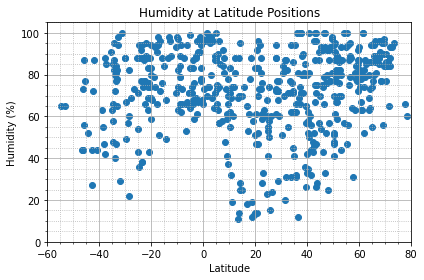

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = cities_df["Latitude"]
y_values = cities_df["Humidity"]
plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

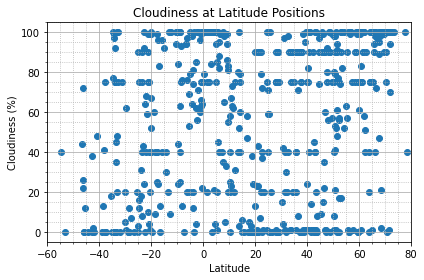

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = cities_df["Latitude"]
y_values = cities_df["Cloudy"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

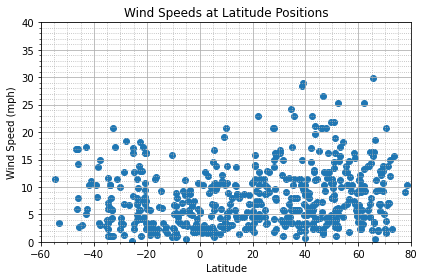

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = cities_df["Latitude"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs. Wind Speed.png")

## Linear Regression

In [20]:
northern = cities_df.loc[cities_df["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = cities_df.loc[cities_df["Latitude"] < 0.0]
southern.reset_index(inplace=True)
#northern.head()
southern.head()

,index,City ID,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudy,Wind Speed
0,1,4032420,Neiafu,TO,-18.6500,-173.9833,84.20,74,40,5.75
1,2,2206939,Bluff,NZ,-46.6000,168.3333,73.00,44,44,17.00
2,4,2163355,Hobart,AU,-42.8794,147.3294,63.28,27,0,17.27
3,7,1651810,Airai,TL,-8.9266,125.4092,71.53,84,63,0.87
4,12,4030556,Rikitea,PF,-23.1203,-134.9692,80.29,74,43,9.80


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

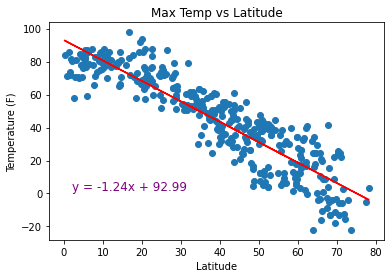

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = northern['Latitude']
y_values = northern['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regressionvals = x_values * slope + intercept
equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values, regressionvals, "r-")
plt.annotate(equation,(2,2), fontsize=12, color="purple")
plt.title("Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()
plt.savefig("Max Temp vs. Latitude Linear North Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

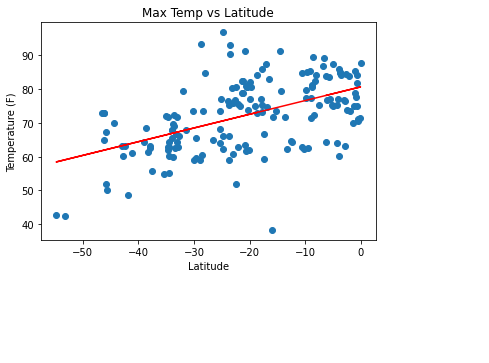

<Figure size 432x288 with 0 Axes>

In [38]:

x_values = southern["Latitude"]
y_values = southern["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regressionvals = x_values * slope + intercept
equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values, regressionvals, "r-")
plt.annotate(equation,(2,2), fontsize=12, color="purple")
plt.title("Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()
plt.savefig("Max Temp vs. Latitude Linear Regression South.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

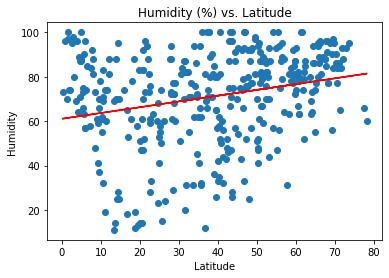

<Figure size 432x288 with 0 Axes>

In [39]:
x_values = northern["Latitude"]
y_values = northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regressionvals = x_values * slope + intercept
equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values, regressionvals, "r-")
plt.annotate(equation,(2,2), fontsize=12, color="purple")
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.savefig("Humidity (%) vs. Latitude Linear North Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

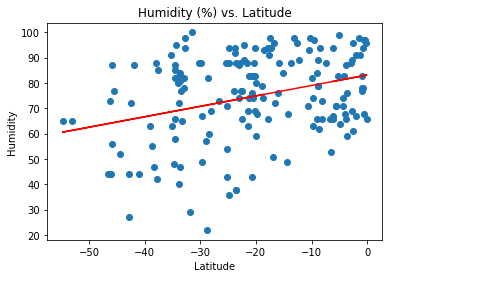

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = southern["Latitude"]
y_values = southern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regressionvals = x_values * slope + intercept
equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values, regressionvals, "r-")
plt.annotate(equation,(2,2), fontsize=12, color="purple")
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.savefig("Humidity (%) vs. Latitude South.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

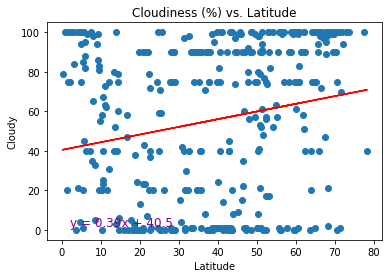

<Figure size 432x288 with 0 Axes>

In [43]:
x_values = northern["Latitude"]
y_values = northern["Cloudy"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regressionvals = x_values * slope + intercept
equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values, regressionvals, "r-")
plt.annotate(equation,(2,2), fontsize=12, color="purple")
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudy")
plt.show()
plt.savefig("Cloudiness (%) vs. Latitude North.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

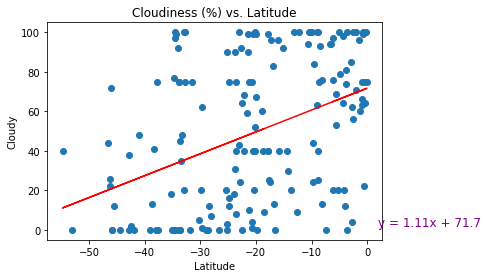

<Figure size 432x288 with 0 Axes>

In [44]:
x_values = southern["Latitude"]
y_values = southern["Cloudy"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regressionvals = x_values * slope + intercept
equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values, regressionvals, "r-")
plt.annotate(equation,(2,2), fontsize=12, color="purple")
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudy")
plt.show()
plt.savefig("Cloudiness (%) vs. Latitude South.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

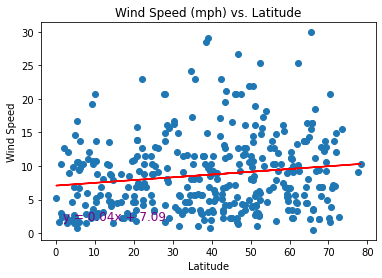

<Figure size 432x288 with 0 Axes>

In [45]:
x_values = northern["Latitude"]
y_values = northern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regressionvals = x_values * slope + intercept
equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values, regressionvals, "r-")
plt.annotate(equation,(2,2), fontsize=12, color="purple")
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("Wind Speed (mph) vs. Latitude North.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

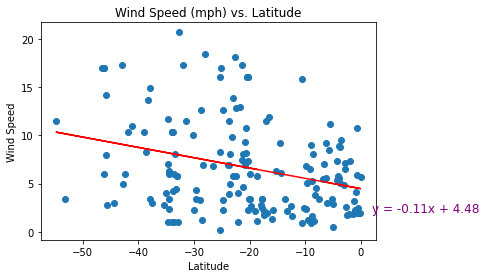

<Figure size 432x288 with 0 Axes>

In [47]:
x_values = southern["Latitude"]
y_values = southern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regressionvals = x_values * slope + intercept
equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values, regressionvals, "r-")
plt.annotate(equation,(2,2), fontsize=12, color="purple")
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("Wind Speed (mph) vs. Latitude South.png")